In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# mostrar todas as colunas
pd.set_option('display.max_columns', None)

# importando o arquivo
df = pd.read_csv('/content/drive/MyDrive/FACULDADE/datasets/credit-score-classification.csv', sep=',')
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [42]:
# Lista de colunas a serem excluídas do dataset
colunas_para_excluir = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Occupation',
    'Type_of_Loan',
    'Changed_Credit_Limit',
    'Payment_Behaviour',
    'Annual_Income',
    'Credit_Utilization_Ratio',
    'Credit_History_Age',
    'Monthly_Balance',
    'Interest_Rate',
    'Num_Credit_Inquiries'
]


# Remove as colunas indesejadas
df = df.drop(columns=colunas_para_excluir)

# Exibe as 10 primeiras linhas do dataframe
df.head(10)


# Motivos da exclusão:

# ID e Customer_ID: identificadores irrelevantes para o treinamento.
# Name e SSN: dados sensíveis e pessoais, sem valor preditivo.
# Month: representa apenas o mês de coleta do dado. Sem análise temporal, não agrega valor.
# Occupation: variável categórica de alta cardinalidade, já representada indiretamente por renda e número de empréstimos.
# Type_of_Loan: variável textual com múltiplos valores, difícil de codificar e redundante com Num_of_Loan.
# Changed_Credit_Limit: redundante com outras variáveis mais diretas como Credit_Utilization_Ratio e Outstanding_Debt.
# Payment_Behaviour: categórica subjetiva, difícil de padronizar, e com comportamento já refletido em outras variáveis.
# Annual_Income: redundante com Monthly_Inhand_Salary, que reflete melhor a renda real disponível.
# Credit_Utilization_Ratio, Credit_History_Age, Monthly_Balance, Interest_Rate, Num_Credit_Inquiries, Monthly_Balance : Usuários comuns geralmente não sabem calcular ou não têm acesso fácil a essa informação.


,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly
0,23,1824.843333,3,4,4,3,7,Good,809.98,No,49.574949,236.64268203272135
1,24,1824.843333,3,4,4,3,9,Good,809.98,No,49.574949,21.465380264657146
2,24,1824.843333,3,4,4,-1,4,Good,809.98,No,49.574949,148.23393788500925
3,24_,NaN,3,4,4,4,5,Good,809.98,No,49.574949,39.08251089460281
4,28,3037.986667,2,4,1,3,1,Good,605.03,No,18.816215,39.684018417945296
5,28,3037.986667,2,4,1,3,3,Good,605.03,No,18.816215,251.62736875017606
6,28,3037.986667,2,4,1,3,NaN,_,605.03,No,18.816215,72.68014533363515
7,28,3037.986667,2,4,1,3,2_,_,605.03,No,18.816215,153.53448761392985
8,35,NaN,1,5,3,8,1942,Good,1303.01,No,246.992319,397.50365354404653
9,35,12187.220000,1,5,3,6,3,Good,1303.01,No,246.992319,453.6151305781054


In [43]:
colunas_para_converter = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
]

df.replace(['_', '__10000__', '_____', '_______',
            '__-333333333333333333333333333333333333__'], np.nan, inplace=True)

for coluna in colunas_para_converter:
    df[coluna] = df[coluna].astype(str).str.replace(r'[^\d\.-]', '', regex=True)
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

print(df.isnull().sum()[df.isnull().sum() > 0])


Monthly_Inhand_Salary      7498
Num_of_Delayed_Payment     3498
Credit_Mix                 9805
Amount_invested_monthly    4446
dtype: int64


In [44]:
# Encontra os índices das linhas com ao menos um valor ausente (NaN)
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()[0]

# Exibe apenas as linhas com valores ausentes
df_com_nulos = df.iloc[idxRowNan]
display(df_com_nulos)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly
3,24,NaN,3,4,4,4,5.0,Good,809.98,No,49.574949,39.082511
6,28,3037.986667,2,4,1,3,NaN,NaN,605.03,No,18.816215,72.680145
7,28,3037.986667,2,4,1,3,2.0,NaN,605.03,No,18.816215,153.534488
8,35,NaN,1,5,3,8,1942.0,Good,1303.01,No,246.992319,397.503654
13,55,2612.490833,2,5,-100,5,8.0,NaN,632.46,No,16.415452,29.393311
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4975,1929.906667,10,8,5,33,25.0,NaN,3571.70,Yes,60.964772,146.486325
49996,25,NaN,4,6,2,20,NaN,Good,502.38,NM,35.104023,181.442999
49997,25,3359.415833,4,6,2,23,5.0,Good,502.38,No,35.104023,NaN
49998,25,NaN,4,6,2,21,6.0,Good,502.38,No,35.104023,97.598580


In [45]:
def trataFaltantes(df):
    '''
    Substitui:
    - Valores numéricos ausentes pela média dentro da mesma classe (Credit_Mix)
    - Valores categóricos ausentes pela moda da coluna
    '''
    df = df.copy()
    colunas_numericas = df.select_dtypes(include='number').columns
    colunas_categoricas = df.select_dtypes(include='object').columns

    # Tratar colunas numéricas com média por classe
    for col in colunas_numericas:
        for idx in df[pd.isnull(df[col])].index:
            classe = df.loc[idx, 'Credit_Mix']
            if pd.notnull(classe):
                media = df.loc[(df['Credit_Mix'] == classe) & (~pd.isnull(df[col])), col].mean()
                df.loc[idx, col] = media
            else:
                df.loc[idx, col] = df[col].mean()

    # Tratar colunas categóricas com moda geral (se existir)
    for col in colunas_categoricas:
        moda_serie = df[col].mode()
        if not moda_serie.empty:
            moda = moda_serie.iloc[0]
            df[col] = df[col].fillna(moda)

    return df

# Aplica a função
df = trataFaltantes(df)

# Verifica se ainda há faltantes
faltantes_restantes = df.isnull().sum()
faltantes_restantes = faltantes_restantes[faltantes_restantes > 0]

if len(faltantes_restantes) == 0:
    print("\n✅ Todos os valores ausentes foram tratados com sucesso.")
else:
    print("\n⚠️ Ainda existem valores ausentes nas seguintes colunas:")
    print(faltantes_restantes)

# Exibe as linhas que originalmente tinham valores ausentes
print("\n🧾 Amostras que possuíam valores faltantes (corrigidas):")
display(df.iloc[idxRowNan])



✅ Todos os valores ausentes foram tratados com sucesso.

🧾 Amostras que possuíam valores faltantes (corrigidas):


,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly
3,24,5659.517729,3,4,4,4,5.000000,Good,809.98,No,49.574949,39.082511
6,28,3037.986667,2,4,1,3,30.888951,Standard,605.03,No,18.816215,72.680145
7,28,3037.986667,2,4,1,3,2.000000,Standard,605.03,No,18.816215,153.534488
8,35,5659.517729,1,5,3,8,1942.000000,Good,1303.01,No,246.992319,397.503654
13,55,2612.490833,2,5,-100,5,8.000000,Standard,632.46,No,16.415452,29.393311
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4975,1929.906667,10,8,5,33,25.000000,Standard,3571.70,Yes,60.964772,146.486325
49996,25,5659.517729,4,6,2,20,23.872449,Good,502.38,NM,35.104023,181.442999
49997,25,3359.415833,4,6,2,23,5.000000,Good,502.38,No,35.104023,251.744220
49998,25,5659.517729,4,6,2,21,6.000000,Good,502.38,No,35.104023,97.598580


In [46]:
# Lista atualizada de colunas que representam a identidade completa da amostra
colunas_identificadoras = [
    'Age', 'Monthly_Inhand_Salary',
    'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly'
]

# Localiza duplicatas baseadas nessas colunas (mantém todas com keep=False)
df_duplicates = df[df.duplicated(subset=colunas_identificadoras, keep=False)]
df_duplicates = df_duplicates.sort_values(by=colunas_identificadoras)

if len(df_duplicates) > 0:
    print('\n⚠️ Amostras duplicadas (redundantes ou inconsistentes):')
    display(df_duplicates)
else:
    print('✅ Não existem valores duplicados com base nos atributos principais.')

# Função de remoção
def delDuplicatas(df, colunas_identificadoras):
    '''
    Remove amostras duplicadas com base nas colunas principais que definem o perfil do cliente.
    Para cada grupo duplicado, mantém apenas a primeira ocorrência.
    '''
    return df.drop_duplicates(subset=colunas_identificadoras, keep='first')

# Aplicar a função
antes = len(df)
df = delDuplicatas(df, colunas_identificadoras)
depois = len(df)

# Exibir resultado
print(f"✅ Duplicatas removidas: {antes - depois}. Dataset final com {depois} linhas.")
display(df)



⚠️ Amostras duplicadas (redundantes ou inconsistentes):


,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly
19980,15,1451.971667,4,5,7,21,11.0,Standard,1852.93,Yes,75.577840,186.279090
19982,15,1451.971667,4,5,7,21,11.0,Standard,1852.93,Yes,75.577840,186.279090
31625,20,2737.911667,5,7,2,28,13.0,Standard,1562.82,Yes,44.339006,186.279090
31626,20,2737.911667,5,7,2,28,13.0,Standard,1562.82,Yes,44.339006,186.279090
27028,26,6498.906187,5,2,2,15,4.0,Good,774.36,No,719.224784,251.744220
27031,26,6498.906187,5,2,2,15,4.0,Good,774.36,No,719.224784,251.744220
27553,28,7711.299703,6,7,5,26,15.0,Standard,1475.05,Yes,662.965429,186.279090
27554,28,7711.299703,6,7,5,26,15.0,Standard,1475.05,Yes,662.965429,186.279090
29936,34,4453.485000,9,5,6,46,17.0,Bad,2484.62,Yes,243.353930,140.578447
29937,34,4453.485000,9,5,6,46,17.0,Bad,2484.62,Yes,243.353930,140.578447


✅ Duplicatas removidas: 18. Dataset final com 49982 linhas.


,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly
0,23,1824.843333,3,4,4,3,7.000000,Good,809.98,No,49.574949,236.642682
1,24,1824.843333,3,4,4,3,9.000000,Good,809.98,No,49.574949,21.465380
2,24,1824.843333,3,4,4,-1,4.000000,Good,809.98,No,49.574949,148.233938
3,24,5659.517729,3,4,4,4,5.000000,Good,809.98,No,49.574949,39.082511
4,28,3037.986667,2,4,1,3,1.000000,Good,605.03,No,18.816215,39.684018
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4975,1929.906667,10,8,5,33,25.000000,Standard,3571.70,Yes,60.964772,146.486325
49996,25,5659.517729,4,6,2,20,23.872449,Good,502.38,NM,35.104023,181.442999
49997,25,3359.415833,4,6,2,23,5.000000,Good,502.38,No,35.104023,251.744220
49998,25,5659.517729,4,6,2,21,6.000000,Good,502.38,No,35.104023,97.598580


In [47]:
def delInconsistencias(df):
    '''
    Remove todas as amostras inconsistentes do dataset.
    Inconsistências são definidas como amostras com os mesmos atributos
    mas classificações (Credit_Mix) diferentes.
    '''
    colunas_atributos = [
        'Age', 'Monthly_Inhand_Salary',
        'Num_Bank_Accounts', 'Num_Credit_Card',
        'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
        'Outstanding_Debt', 'Payment_of_Min_Amount',
        'Total_EMI_per_month', 'Amount_invested_monthly'
    ]

    # Identifica duplicatas com base nos atributos (ignorando Credit_Mix)
    duplicados = df[df.duplicated(subset=colunas_atributos, keep=False)]

    # Encontra grupos com múltiplos rótulos Credit_Mix
    grupos_inconsistentes = duplicados.groupby(colunas_atributos)['Credit_Mix'].nunique()
    grupos_inconsistentes = grupos_inconsistentes[grupos_inconsistentes > 1]

    # Remove todas as amostras desses grupos
    for _, grupo in grupos_inconsistentes.reset_index().iterrows():
        condicao = np.logical_and.reduce([
            df[col] == grupo[col] for col in colunas_atributos
        ])
        df = df[~condicao]

    return df

# ✅ Define colunas_atributos fora da função, se quiser reutilizar
colunas_atributos = [
    'Age', 'Monthly_Inhand_Salary',
    'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Outstanding_Debt', 'Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly'
]

# Aplica a função de limpeza
antes = len(df)
df = delInconsistencias(df)
depois = len(df)

# Verifica se ainda há duplicatas com rótulos inconsistentes
df_duplicates = df[df.duplicated(subset=colunas_atributos, keep=False)]

if len(df_duplicates) > 0:
    print('⚠️ Ainda existem amostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print(f'✅ Inconsistências removidas com sucesso. {antes - depois} linhas eliminadas.')



✅ Inconsistências removidas com sucesso. 2 linhas eliminadas.


In [48]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df.describe()

display(df_detalhes)



#INCONSISTÊNCIAS QUE PRECISAM SER TRATADAS

# Age:
# - Mínimo = -500 → idade negativa é inválida
# - Máximo = 8688 → idade biologicamente impossível
# - Média = 109 com desvio padrão de 679 → forte presença de outliers

# Monthly_Inhand_Salary:
# - Varia de 303 a 15.204 → plausível, mas verificar cauda alta para possíveis outliers

# Num_Bank_Accounts:
# - Mínimo = -1 → número negativo de contas é inválido
# - Máximo = 1798 → valor extremamente elevado
# - Desvio padrão = 116 → forte presença de outliers

# Num_Credit_Card:
# - Máximo = 1499 → número extremamente alto de cartões, fora do normal

# Num_of_Loan:
# - Mínimo = -100 → número negativo de empréstimos é inválido
# - Máximo = 1496 → valor irrealista
# - Desvio padrão = 66 → indica presença de outliers

# Delay_from_due_date:
# - Mínimo = -5 dias → atraso negativo não faz sentido

# Num_of_Delayed_Payment:
# - Mínimo = -3 → valor negativo inválido
# - Máximo = 4399 → extremamente alto
# - Desvio padrão = 213 → forte presença de outliers

# Outstanding_Debt:
# - Varia entre 0.23 e 4998 → valores plausíveis, mas convém revisar casos extremos

# Total_EMI_per_month:
# - Máximo = 82.398 → extremamente alto
# - Desvio padrão = 8.597 → forte presença de outliers

# Amount_invested_monthly:
# - Varia de 0 a 1908 → razoável, mas convém verificar se valores zero são válidos ou ausências

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly
count,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000
mean,109.743037,4182.458632,16.843037,22.928391,3.403461,21.052341,30.925328,1426.310680,1491.820523,194.788974
std,679.830823,2950.421215,116.419877,129.340206,66.377289,14.860381,213.667785,1155.279315,8597.327036,188.062585
min,-500.000000,303.645417,-1.000000,0.000000,-100.000000,-5.000000,-3.000000,0.230000,0.000000,0.000000
25%,25.000000,1794.304167,3.000000,4.000000,1.000000,10.000000,9.000000,566.050000,32.222388,77.015585
50%,34.000000,3507.695000,6.000000,5.000000,3.000000,18.000000,15.000000,1166.230000,74.733349,140.578447
75%,43.000000,5659.517729,7.000000,7.000000,5.000000,28.000000,19.000000,1946.810000,176.146366,235.870186
max,8688.000000,15204.633333,1798.000000,1499.000000,1496.000000,67.000000,4399.000000,4998.070000,82398.000000,1908.124400


In [49]:
def limpar_valores_invalidos(df):
    """
    Remove registros com valores ilógicos, extremos ou fisicamente impossíveis.
    Exibe quantos registros foram removidos por cada filtro aplicado.
    """
    df_original = df.copy()
    total_inicial = len(df)

    def filtrar(df, condicao, nome):
        antes = len(df)
        df_filtrado = df[condicao]
        removidos = antes - len(df_filtrado)
        print(f"{nome}: {removidos} registros removidos")
        return df_filtrado

    # Idade: deve estar entre 18 e 100 anos
    df = filtrar(df, (df['Age'] >= 18) & (df['Age'] <= 100), "Idade inválida")

    # Salário mensal em mãos: salário abaixo de 0 não faz sentido
    df = filtrar(df, df['Monthly_Inhand_Salary'] >= 0, "Salário mensal inválido")

    # Contas bancárias: não pode ser negativa e mais de 50 é improvável
    df = filtrar(df, (df['Num_Bank_Accounts'] >= 0) & (df['Num_Bank_Accounts'] <= 50), "Contas bancárias inválidas")

    # Cartões de crédito: valor negativo é inválido, mais de 50 é improvável
    df = filtrar(df, (df['Num_Credit_Card'] >= 0) & (df['Num_Credit_Card'] <= 50), "Cartões de crédito inválidos")

    # Número de empréstimos: deve ser entre 0 e 40
    df = filtrar(df, (df['Num_of_Loan'] >= 0) & (df['Num_of_Loan'] <= 40), "Número de empréstimos inválido")

    # Atraso na data de vencimento: de 0 a 365 dias
    df = filtrar(df, (df['Delay_from_due_date'] >= 0) & (df['Delay_from_due_date'] <= 365), "Atraso inválido")

    # Número de pagamentos atrasados: maior ou igual a 0
    df = filtrar(df, df['Num_of_Delayed_Payment'] >= 0, "Pagamentos atrasados inválidos")

    # Dívida pendente: não pode ser negativa
    df = filtrar(df, df['Outstanding_Debt'] >= 0, "Dívida pendente negativa")

    # Total de parcelas mensais (EMI): não pode ser negativa, máximo razoável = 500 mil
    df = filtrar(df, (df['Total_EMI_per_month'] >= 0) & (df['Total_EMI_per_month'] <= 500_000), "EMI inválida")

    # Valor investido mensalmente: não pode ser negativo
    df = filtrar(df, df['Amount_invested_monthly'] >= 0, "Investimento mensal negativo")

    total_final = len(df)
    print(f"\nTotal de registros removidos: {total_inicial - total_final}")
    print(f"Total final de registros válidos: {total_final}")

    return df

In [50]:
def remover_outliers_IQR(df, coluna):
    """
    Remove outliers de uma coluna usando o método IQR (1.5*IQR).
    """
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]


def limpar_dados_completo(df):
    """
    Pipeline completo de limpeza de dados:
    - Remove valores ilógicos/inválidos com base em regras de negócio
    - Aplica IQR para remover outliers em colunas com alta variabilidade
    """
    df = limpar_valores_invalidos(df)

    # Lista de colunas onde aplicaremos o IQR (alta variabilidade confirmada)
    colunas_iqr = [
        'Outstanding_Debt',
        'Total_EMI_per_month',
        'Amount_invested_monthly'
    ]

    for coluna in colunas_iqr:
        df = remover_outliers_IQR(df, coluna)

    return df


# Aplicando a limpeza
df_limpo = limpar_dados_completo(df)
display(df_limpo.describe())


Idade inválida: 3904 registros removidos
Salário mensal inválido: 0 registros removidos
Contas bancárias inválidas: 587 registros removidos
Cartões de crédito inválidos: 1038 registros removidos
Número de empréstimos inválido: 1975 registros removidos
Atraso inválido: 263 registros removidos
Pagamentos atrasados inválidos: 252 registros removidos
Dívida pendente negativa: 0 registros removidos
EMI inválida: 0 registros removidos
Investimento mensal negativo: 0 registros removidos

Total de registros removidos: 8019
Total final de registros válidos: 41961


,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly
count,33494.000000,33494.000000,33494.000000,33494.000000,33494.000000,33494.000000,33494.000000,33494.000000,33494.000000,33494.000000
mean,34.895683,3815.878851,5.254344,5.445304,3.290410,20.130800,30.613903,1238.441767,87.531584,150.133383
std,10.175640,2661.392809,2.574853,2.189356,2.319881,14.165384,215.420527,890.022992,83.591906,98.294710
min,18.000000,303.645417,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,0.000000,0.000000
25%,26.000000,1699.924167,3.000000,4.000000,2.000000,10.000000,9.000000,540.290000,26.371076,72.980431
50%,35.000000,3133.171667,5.000000,5.000000,3.000000,17.000000,14.000000,1101.380000,60.275115,130.009344
75%,43.000000,5162.271667,7.000000,7.000000,5.000000,27.000000,19.000000,1672.200000,127.447159,196.463269
max,56.000000,15204.633333,44.000000,50.000000,35.000000,67.000000,4399.000000,3862.450000,380.722490,467.594322


In [51]:
# Lista das colunas numéricas existentes no seu dataset
colunas_numericas = [
    'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly'
]

# Converte as colunas numéricas para float (caso estejam como string)
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# Trata valores ausentes com a média da coluna
if df[colunas_numericas].isnull().values.any():
    df[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].mean())

# Função de normalização z-score
def normalizar(X):
    m, n = X.shape
    X_norm = np.zeros((m, n))
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    sigma[sigma == 0] = 1  # evita divisão por zero
    for i in range(m):
        X_norm[i, :] = (X[i, :] - mu) / sigma
    return X_norm, mu, sigma

# Seleciona os dados numéricos para normalização
X = df[colunas_numericas].values

# Aplica a normalização
X_norm, mu, sigma = normalizar(X)

# Atualiza o DataFrame com os dados normalizados
df[colunas_numericas] = X_norm

# Exibe a primeira amostra antes e depois da normalização (usando as duas primeiras colunas como exemplo)
print('\n📌 Primeira amostra antes da normalização: [%2.4f, %2.4f]' % (X[0, 0], X[0, 1]))
print('📌 Após a normalização (esperado: média ~0, desvio ~1): [%2.4f, %2.4f]' % (X_norm[0, 0], X_norm[0, 1]))

# Visualiza resultado
display(df.head())



📌 Primeira amostra antes da normalização: [23.0000, 1824.8433]
📌 Após a normalização (esperado: média ~0, desvio ~1): [-0.1276, -0.7991]


,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly
0,-0.127595,-0.799078,-0.118906,-0.146346,0.008987,-1.214797,-0.111974,Good,-0.533491,No,-0.167755,0.222552
1,-0.126124,-0.799078,-0.118906,-0.146346,0.008987,-1.214797,-0.102614,Good,-0.533491,No,-0.167755,-0.921627
2,-0.126124,-0.799078,-0.118906,-0.146346,0.008987,-1.483969,-0.126015,Good,-0.533491,No,-0.167755,-0.247551
3,-0.126124,0.500627,-0.118906,-0.146346,0.008987,-1.147504,-0.121335,Good,-0.533491,No,-0.167755,-0.827950
4,-0.120240,-0.387901,-0.127496,-0.146346,-0.036209,-1.214797,-0.140055,Good,-0.710894,No,-0.171333,-0.824752


In [52]:
# Boxplot após remoção de outliers
df.boxplot(figsize=(15, 7))
plt.title("Boxplot após remoção de outliers")
plt.show()

# Pairplot (com base na variável alvo real: 'Credit_Mix')
sns.pairplot(df, hue='Credit_Mix', height=3.5)
plt.show()



Output hidden; open in https://colab.research.google.com to view.

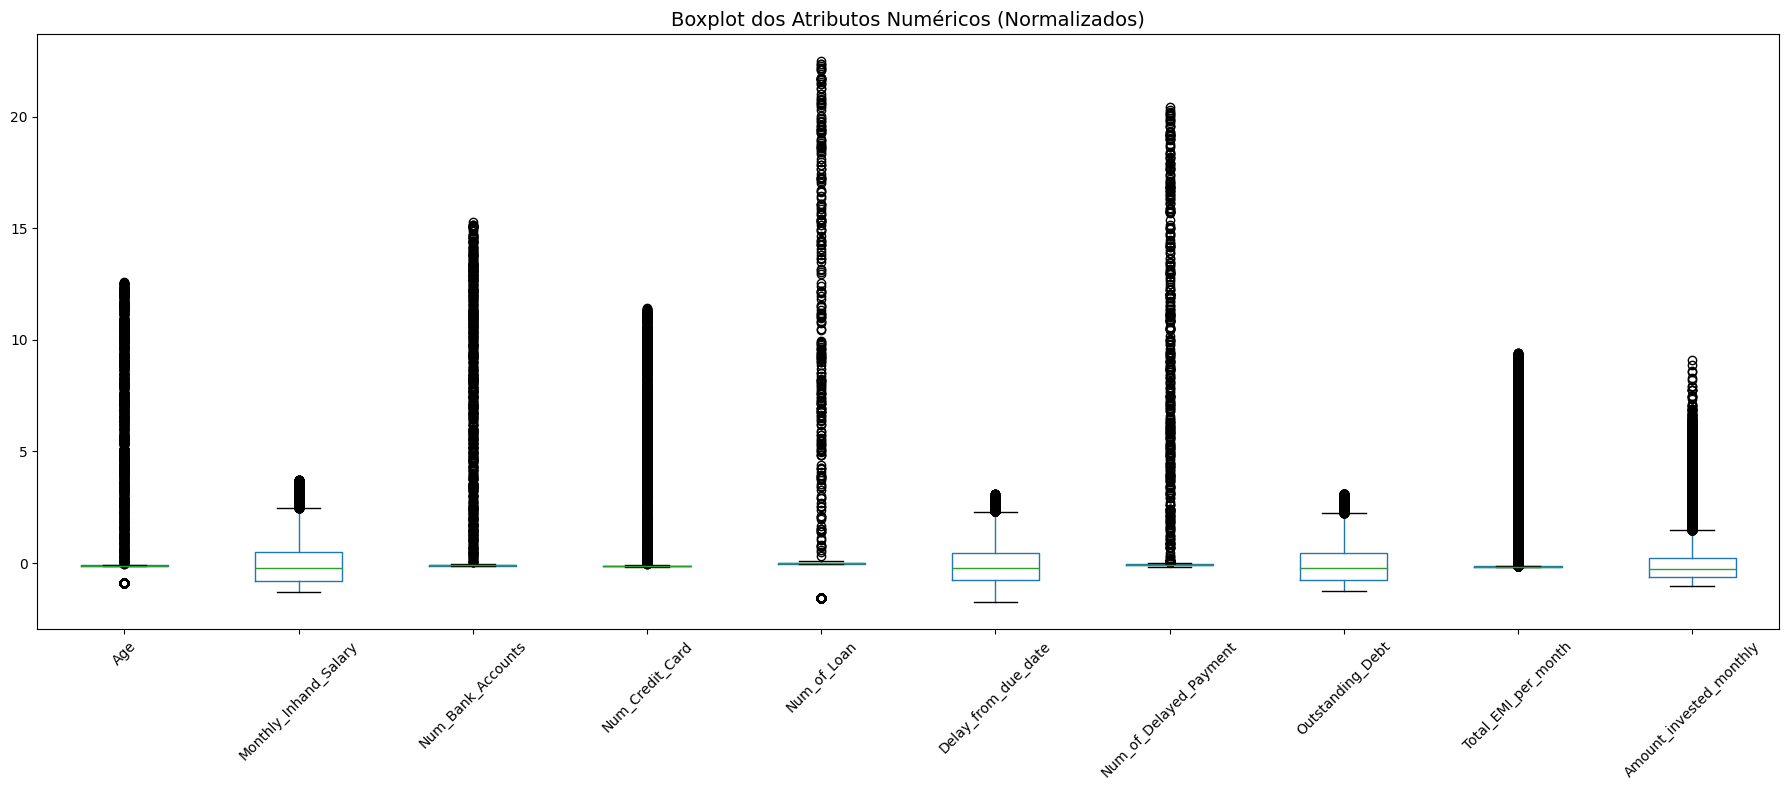

In [53]:
# Gera boxplots para todas as colunas numéricas normalizadas
df.boxplot(column=colunas_numericas, figsize=(18, 8), rot=45, grid=False)
plt.title("Boxplot dos Atributos Numéricos (Normalizados)", fontsize=14)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()


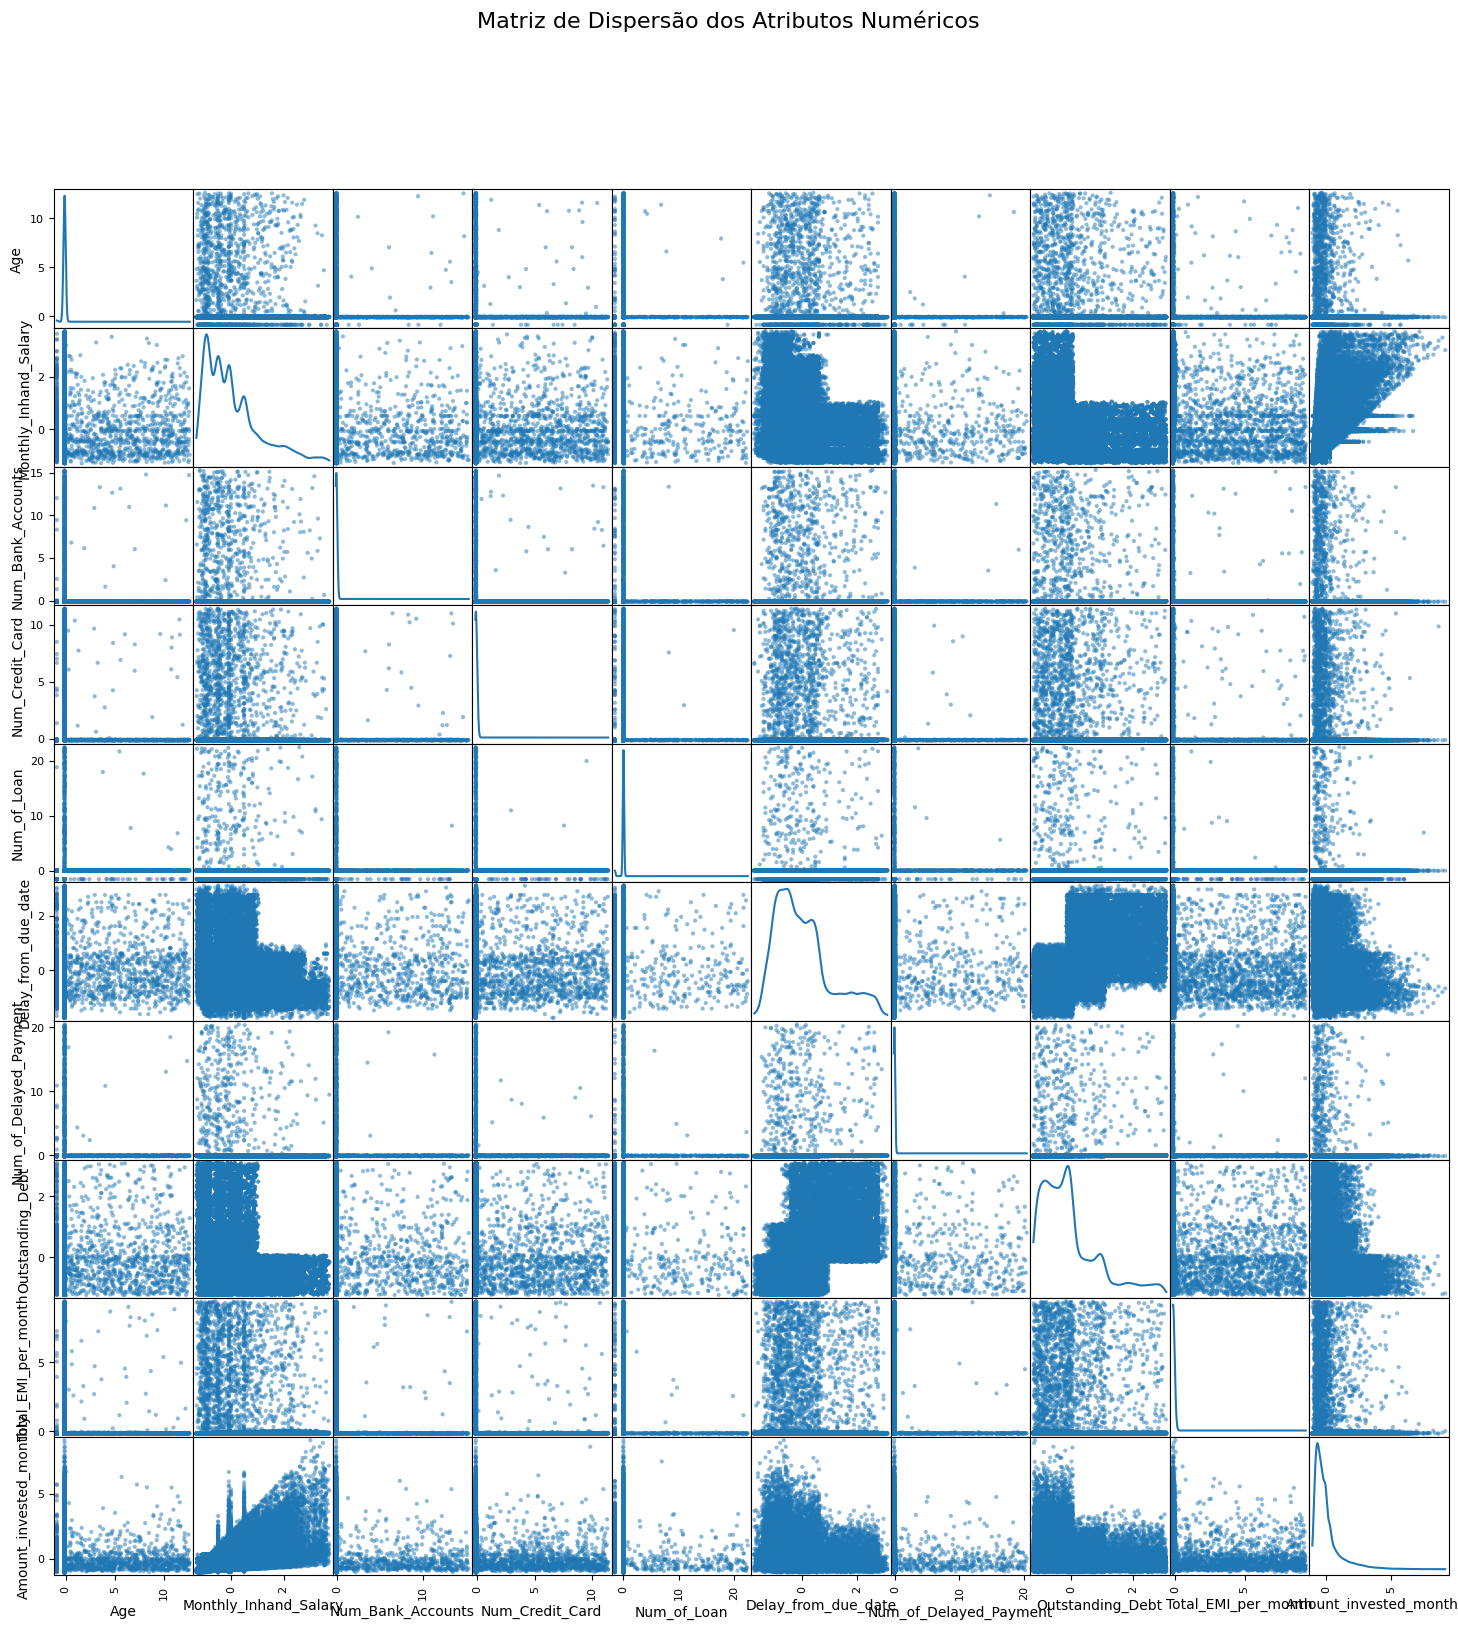

In [54]:
# Matriz de dispersão rápida (pode demorar se o dataset for grande)
pd.plotting.scatter_matrix(df[colunas_numericas], figsize=(18, 18), diagonal='kde')
plt.suptitle("Matriz de Dispersão dos Atributos Numéricos", fontsize=16)
plt.show()


In [55]:
print(df[colunas_numericas].isnull().sum())  # Deve ser zero em todas
print(df[colunas_numericas].describe())  # Verifique min, max, std, etc


Age                        0
Monthly_Inhand_Salary      0
Num_Bank_Accounts          0
Num_Credit_Card            0
Num_of_Loan                0
Delay_from_due_date        0
Num_of_Delayed_Payment     0
Outstanding_Debt           0
Total_EMI_per_month        0
Amount_invested_monthly    0
dtype: int64
                Age  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  4.998000e+04           4.998000e+04       4.998000e+04   
mean  -2.558977e-18           2.868898e-16       6.610692e-18   
std    1.000000e+00           1.000000e+00       1.000000e+00   
min   -8.969041e-01          -1.314664e+00      -1.532645e-01   
25%   -1.246531e-01          -8.094283e-01      -1.189061e-01   
50%   -1.114145e-01          -2.287008e-01      -9.313734e-02   
75%   -9.817595e-02           5.006265e-01      -8.454774e-02   
max    1.261822e+01           3.735797e+00       1.529942e+01   

       Num_Credit_Card   Num_of_Loan  Delay_from_due_date  \
count     4.998000e+04  4.998000e+04         4.998

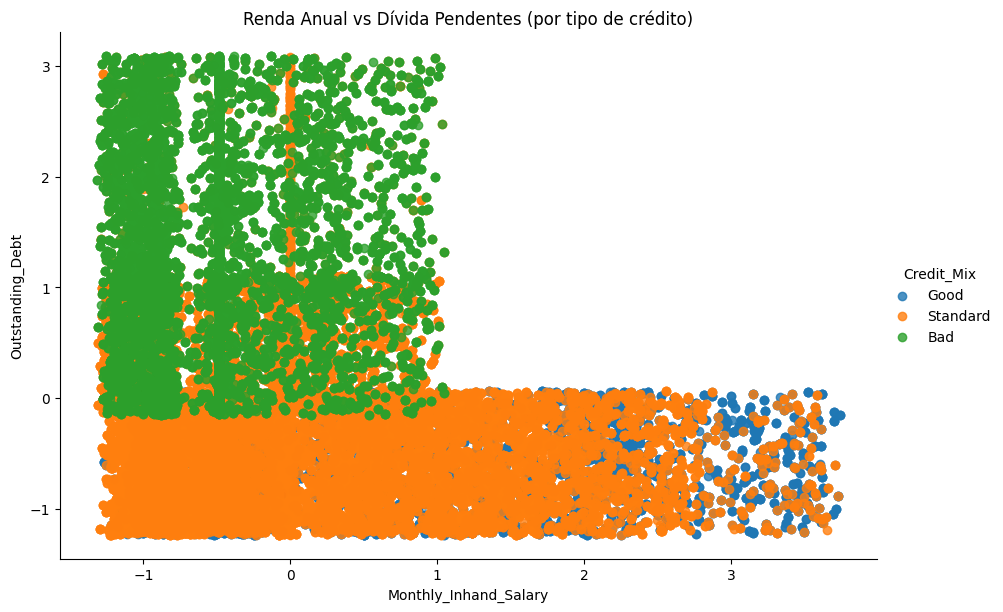

In [56]:
# Relação entre renda anual e dívida pendente colorido por tipo de crédito
sns.lmplot(x='Monthly_Inhand_Salary', y='Outstanding_Debt', data=df,
           fit_reg=False, hue='Credit_Mix', height=6, aspect=1.5)

plt.title('Renda Anual vs Dívida Pendentes (por tipo de crédito)')
plt.show()


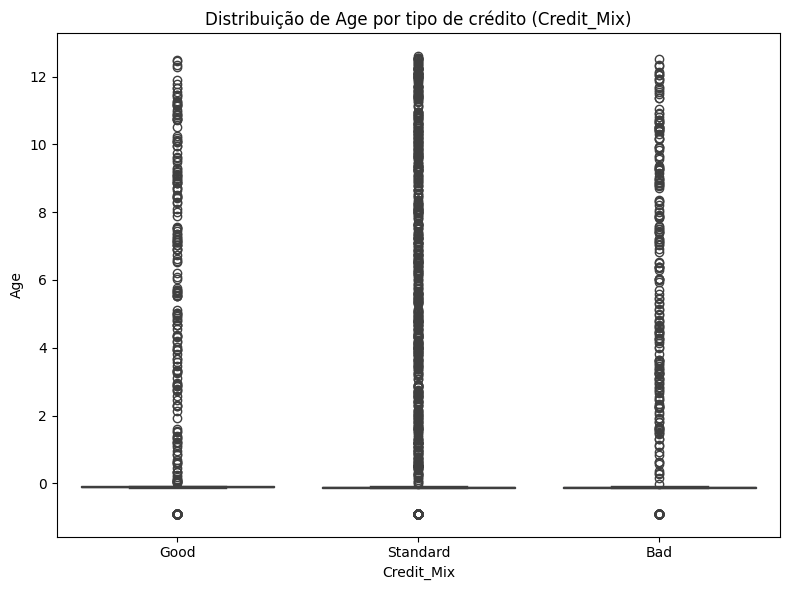

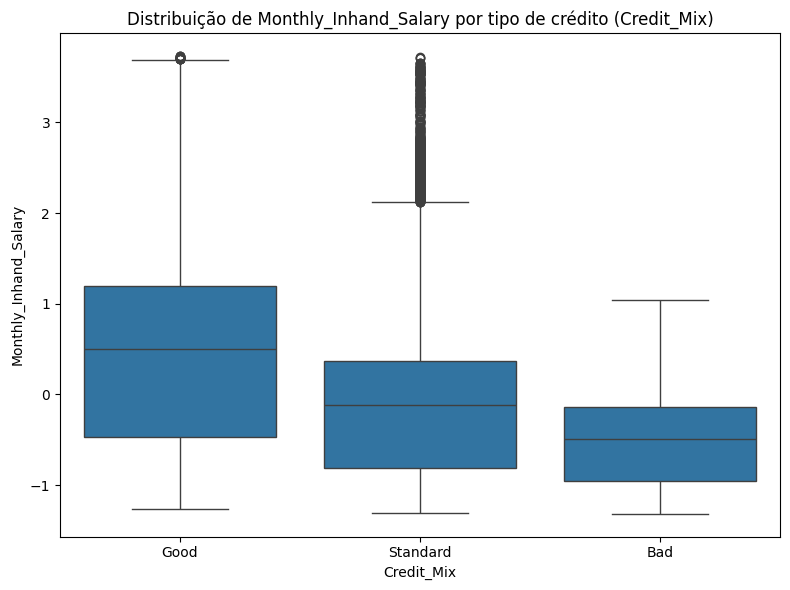

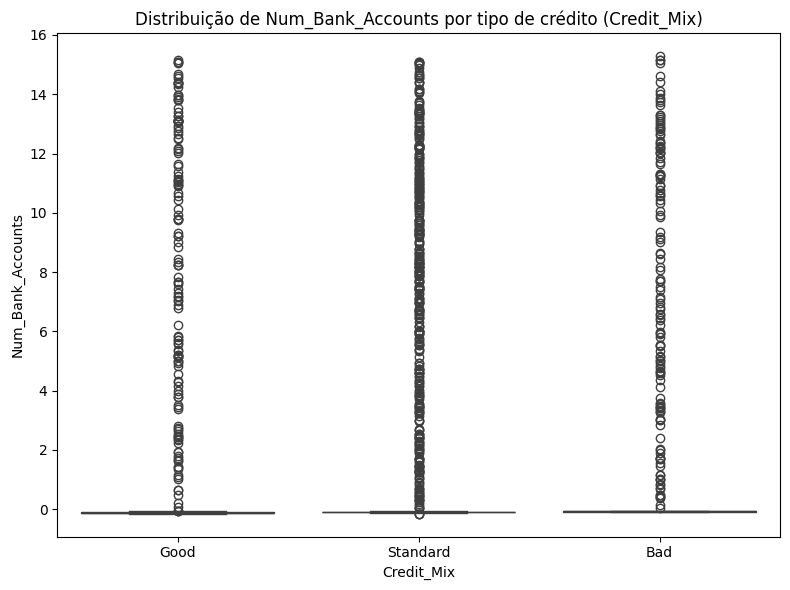

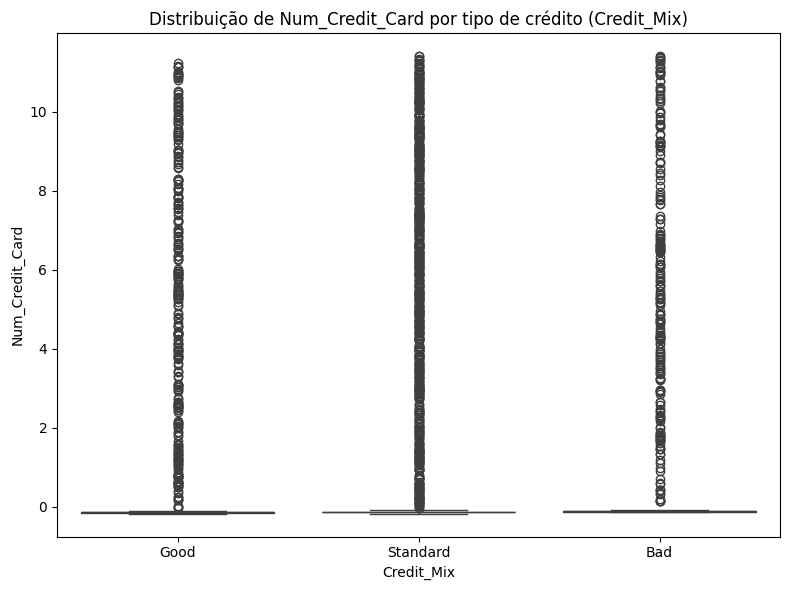

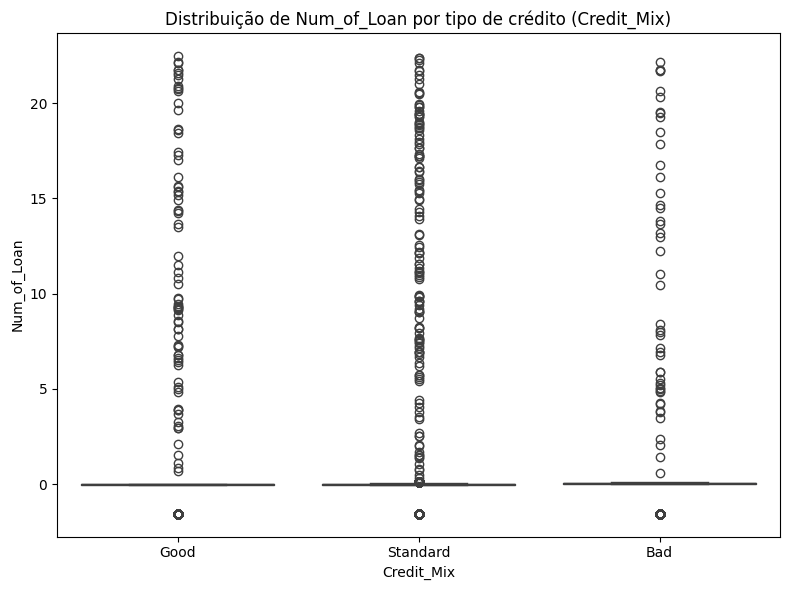

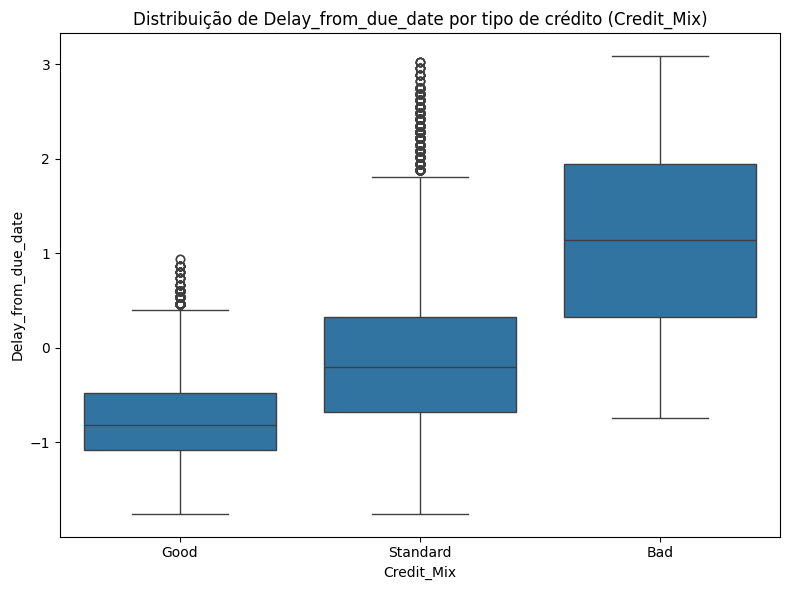

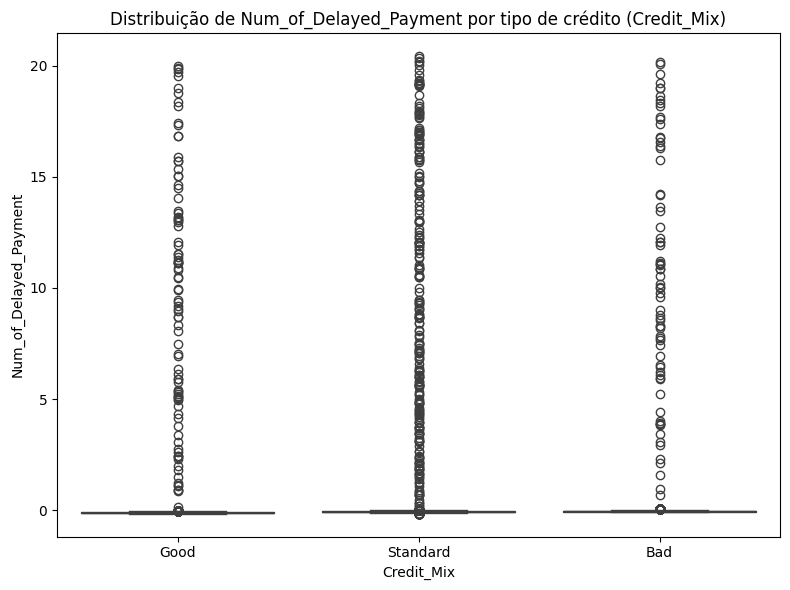

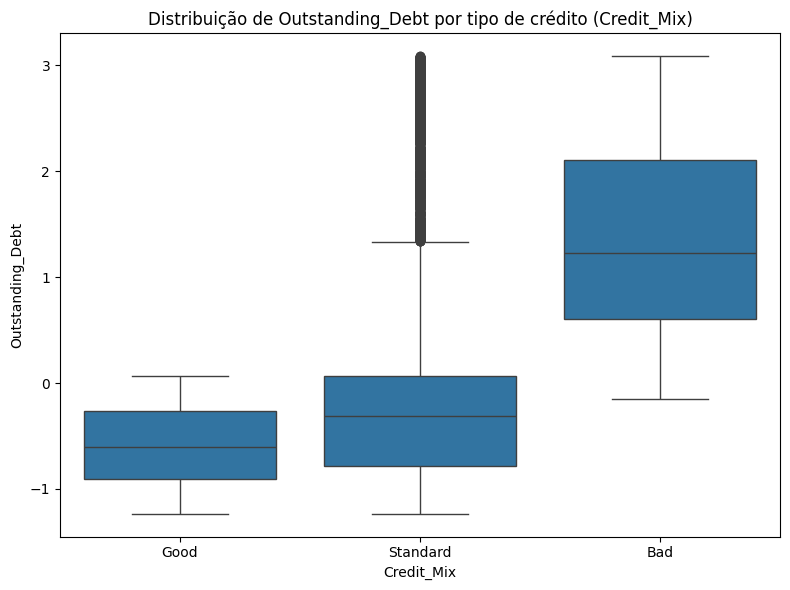

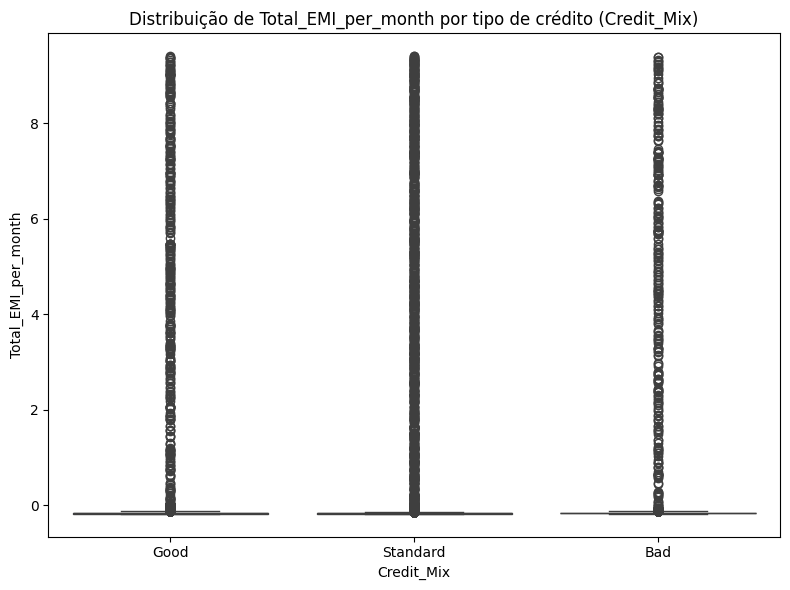

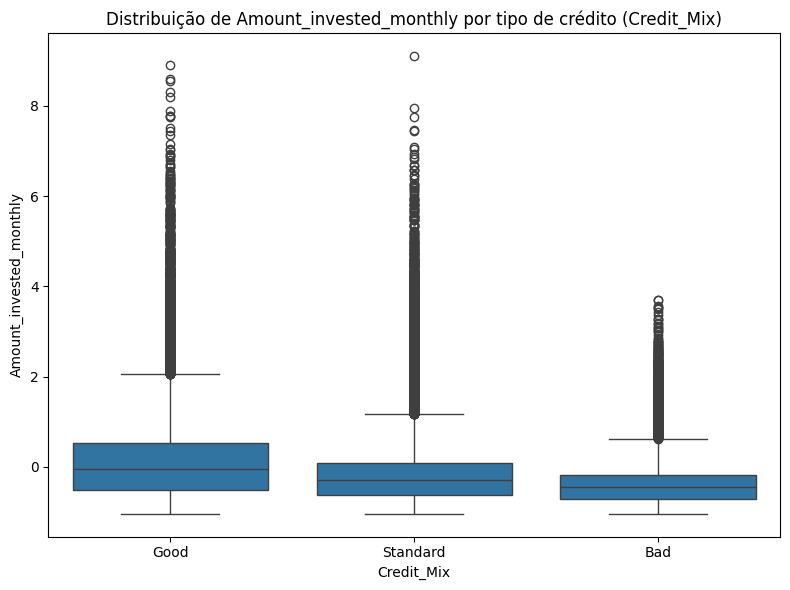

In [57]:
# Gera um boxplot por atributo, separado por categoria de crédito
for atributo in colunas_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Credit_Mix', y=atributo, data=df, whis=1.5)
    plt.title(f'Distribuição de {atributo} por tipo de crédito (Credit_Mix)')
    plt.tight_layout()
    plt.show()


Credit_Mix
Standard    28176
Good        12252
Bad          9552
Name: count, dtype: int64


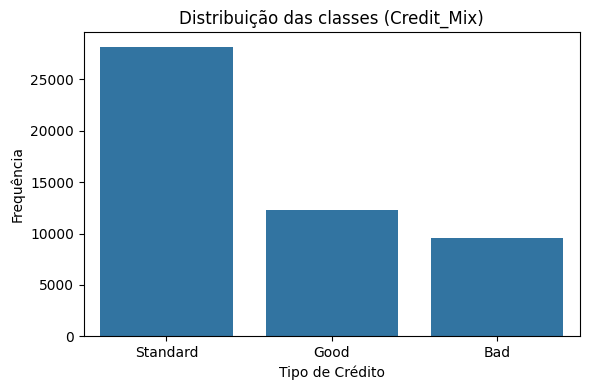

In [58]:
# Frequência de cada categoria da variável-alvo
print(df['Credit_Mix'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_Mix', data=df, order=df['Credit_Mix'].value_counts().index)
plt.title("Distribuição das classes (Credit_Mix)")
plt.xlabel('Tipo de Crédito')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


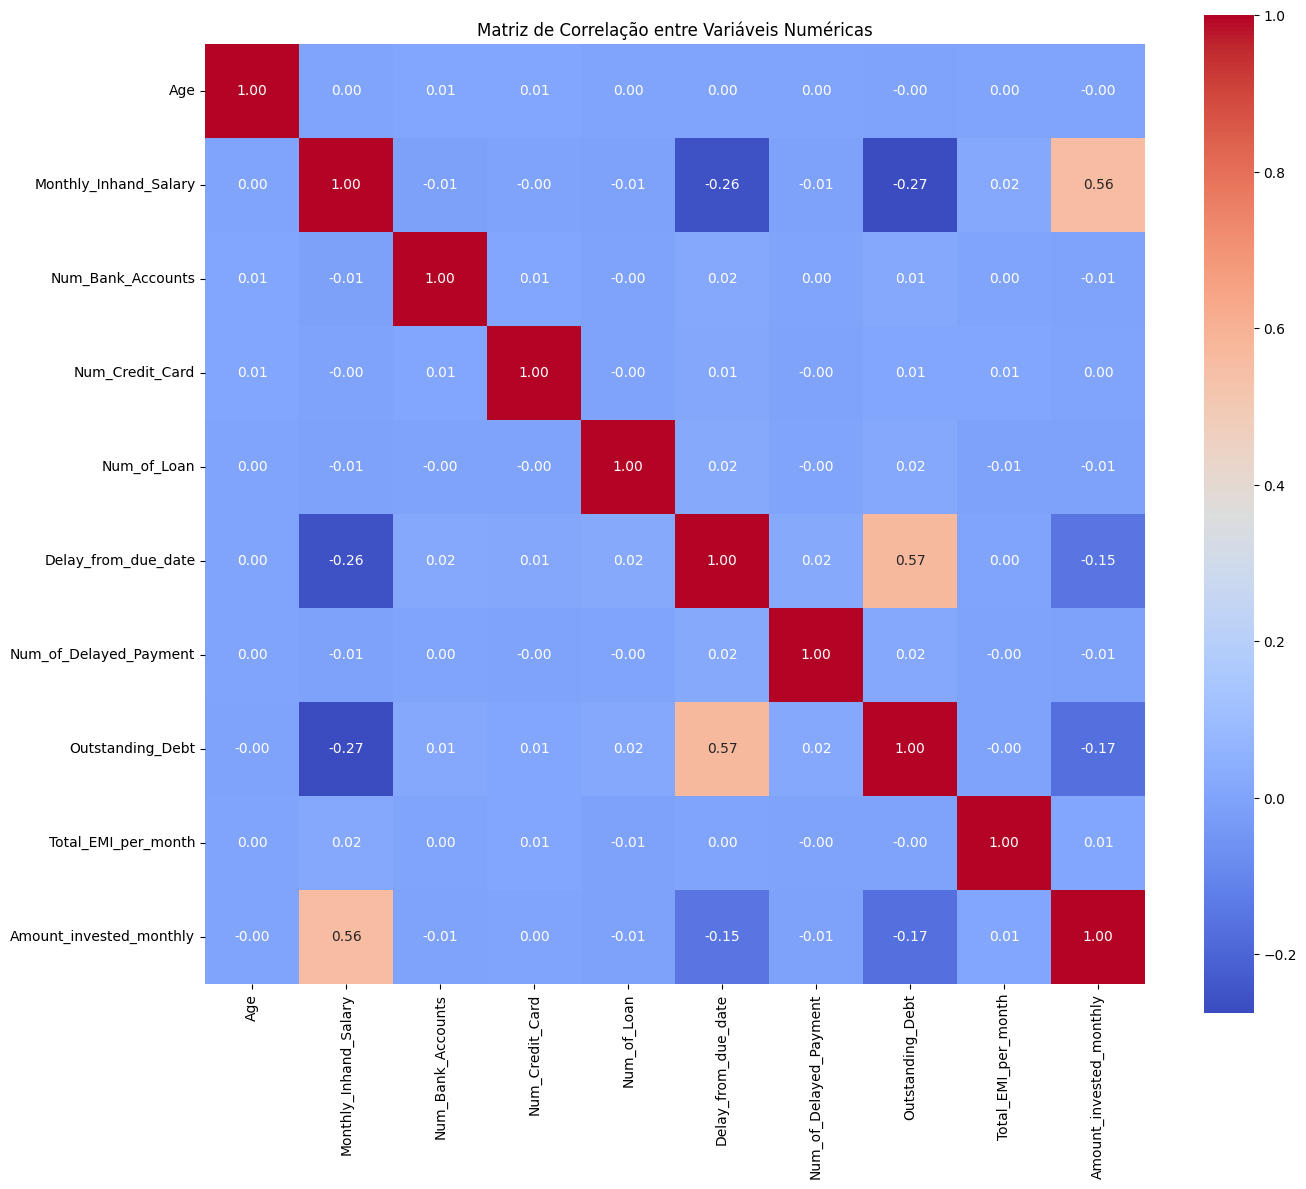

In [59]:
# Cria e exibe a matriz de correlação com rótulos
corr_matrix = df[colunas_numericas].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()
